In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [4]:
#Get independent / input features
n=df.keys()
print(n)


Index(['id', 'title', 'author', 'text', 'label'], dtype='object')


In [5]:
X=df.iloc[:,0:4]

In [6]:
X

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [7]:
## Get the Dependent/output features
Y=df['label']

In [8]:
Y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [11]:
df=df.dropna() #remove NA values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 857.1+ KB


In [13]:
df1=df.copy()

In [14]:
df1.reset_index(inplace=True)

In [15]:
df1

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...,...
18280,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
18281,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
18282,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
18283,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [19]:
#Data Preprocessing
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(df1)):
    review = re.sub('[^a-zA-Z]', ' ', df1['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [20]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

In [21]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [22]:
X.shape

(18285, 5000)

In [23]:
Y=df1['label']


In [24]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [25]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [26]:
cv.get_params()


{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [27]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())


In [28]:
count_df #BOW 

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13710,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
import matplotlib.pyplot as plt

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# MultinomialNB Algorithm


In [32]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [33]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.903
Confusion matrix, without normalization


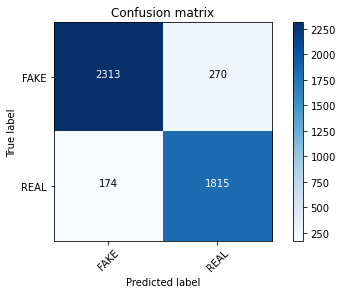

In [35]:
classifier.fit(X_train, Y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
cm = metrics.confusion_matrix(Y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [36]:
classifier.fit(X_train, Y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
score

0.9028871391076115

# Multinomial Classifier with Hyperparameter


In [38]:
classifier=MultinomialNB(alpha=0.1)


In [41]:
classifier=MultinomialNB(alpha=0.1)
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,Y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(Y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score : 0.8954505686789151
Alpha: 0.1, Score : 0.9041994750656168
Alpha: 0.2, Score : 0.9041994750656168
Alpha: 0.30000000000000004, Score : 0.9046369203849519
Alpha: 0.4, Score : 0.9037620297462817
Alpha: 0.5, Score : 0.902230971128609
Alpha: 0.6000000000000001, Score : 0.902230971128609
Alpha: 0.7000000000000001, Score : 0.9024496937882764
Alpha: 0.8, Score : 0.902230971128609
Alpha: 0.9, Score : 0.9017935258092739


In [42]:
## Get Features names
feature_names = cv.get_feature_names()

In [43]:
classifier.coef_[0]


array([ -9.20267844,  -8.60586237,  -9.20267844, ..., -10.89727416,
        -8.86039223,  -9.43093709])

In [44]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-3.973098876576489, 'trump'),
 (-4.2743900947474165, 'hillari'),
 (-4.359134338152135, 'clinton'),
 (-4.881388041659348, 'elect'),
 (-5.1432915827830525, 'new'),
 (-5.235471759504486, 'comment'),
 (-5.278888207220834, 'video'),
 (-5.371821222788021, 'war'),
 (-5.3807141226572694, 'hillari clinton'),
 (-5.394203535835906, 'us'),
 (-5.426405030173618, 'fbi'),
 (-5.445282419435391, 'vote'),
 (-5.4940964047556236, 'email'),
 (-5.550695871754514, 'world'),
 (-5.588456560737901, 'obama'),
 (-5.711130592263641, 'donald'),
 (-5.736304986522991, 'russia'),
 (-5.7426988701982475, 'donald trump'),
 (-5.8509857645905425, 'day'),
 (-5.85815939650168, 'presid')]

In [45]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-10.897274161919805, 'abroad'),
 (-10.897274161919805, 'abus new'),
 (-10.897274161919805, 'abus new york'),
 (-10.897274161919805, 'act new'),
 (-10.897274161919805, 'act new york'),
 (-10.897274161919805, 'advic'),
 (-10.897274161919805, 'advis new'),
 (-10.897274161919805, 'advis new york'),
 (-10.897274161919805, 'age new'),
 (-10.897274161919805, 'age new york'),
 (-10.897274161919805, 'agenda breitbart'),
 (-10.897274161919805, 'aleppo new'),
 (-10.897274161919805, 'aleppo new york'),
 (-10.897274161919805, 'ali'),
 (-10.897274161919805, 'america breitbart'),
 (-10.897274161919805, 'america new york'),
 (-10.897274161919805, 'american breitbart'),
 (-10.897274161919805, 'american new'),
 (-10.897274161919805, 'american new york'),
 (-10.897274161919805, 'ami'),
 (-10.897274161919805, 'ami schumer'),
 (-10.897274161919805, 'amp'),
 (-10.897274161919805, 'applaud'),
 (-10.897274161919805, 'arson'),
 (-10.897274161919805, 'asian'),
 (-10.897274161919805, 'assail'),
 (-10.897274161